In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("data/italy_20200325.xlsx", sheet_name='Wide', index_col='Date', parse_dates=True, dayfirst=True)
df['Growth_Rate'] = df['Confirmed_New'].divide(df['Active_Total'])
df

,VDA_Confirmed,VDA_Deaths,LIG_Confirmed,LIG_Deaths,PIE_Confirmed,PIE_Deaths,LOM_Confirmed,LOM_Deaths,VEN_Confirmed,VEN_Deaths,...,SAR_Deaths,Confirmed_New,Confirmed_Total,Deaths_New,Deaths_Total,Active_ICU,Active_Total,Recovered,Tested,Growth_Rate
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,2,NaN,NaN,NaN,2,NaN,NaN,1.000000
2020-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,3,NaN,NaN,NaN,3,NaN,NaN,0.333333
2020-02-21,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,2.0,1.0,...,NaN,17,20,1.0,1.0,NaN,19,NaN,NaN,0.894737
2020-02-22,NaN,NaN,NaN,NaN,1.0,NaN,40.0,1.0,16.0,NaN,...,NaN,59,79,1.0,2.0,18.0,75,NaN,NaN,0.786667
2020-02-23,NaN,NaN,NaN,NaN,2.0,NaN,57.0,1.0,7.0,NaN,...,NaN,71,150,1.0,3.0,25.0,147,NaN,NaN,0.482993
2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,61.0,4.0,7.0,NaN,...,NaN,77,227,4.0,7.0,27.0,199,1.0,NaN,0.386935
2020-02-25,NaN,NaN,1.0,NaN,NaN,NaN,67.0,2.0,11.0,1.0,...,NaN,93,320,3.0,10.0,35.0,309,1.0,8600.0,0.300971
2020-02-26,NaN,NaN,10.0,NaN,NaN,NaN,65.0,1.0,28.0,NaN,...,NaN,125,445,2.0,12.0,36.0,430,3.0,9587.0,0.290698
2020-02-27,NaN,NaN,8.0,NaN,1.0,NaN,98.0,5.0,40.0,NaN,...,NaN,205,650,5.0,17.0,56.0,588,45.0,12014.0,0.348639


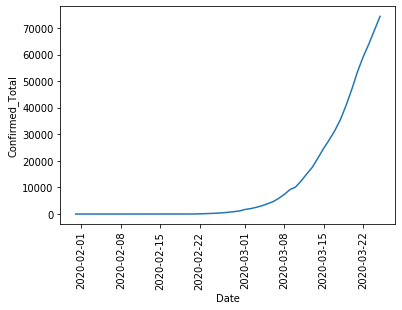

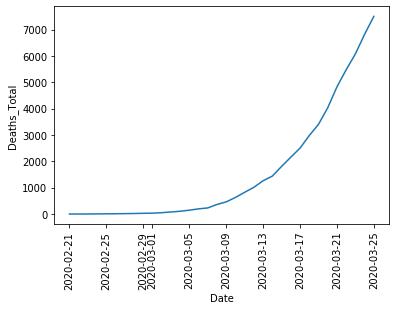

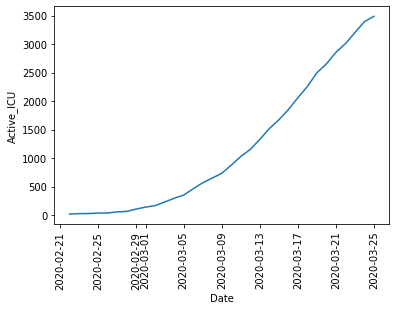

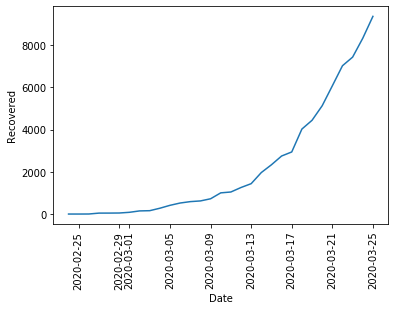

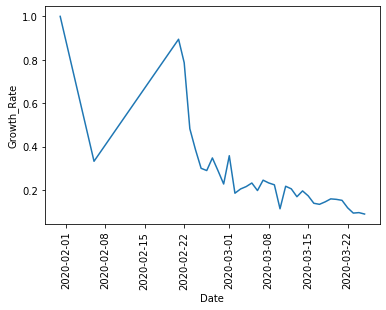

In [40]:
sns.lineplot('Date', 'Confirmed_Total', data=df.reset_index())
plt.xticks(rotation=90)
plt.show()

sns.lineplot('Date', 'Deaths_Total', data=df.reset_index())
plt.xticks(rotation=90)
plt.show()

sns.lineplot('Date', 'Active_ICU', data=df.reset_index())
plt.xticks(rotation=90)
plt.show()

sns.lineplot('Date', 'Recovered', data=df.reset_index())
plt.xticks(rotation=90)
plt.show()

sns.lineplot('Date', 'Growth_Rate', data=df.reset_index())
plt.xticks(rotation=90)
plt.show()

In [67]:
df_confirmed = pd.melt(df.reset_index(), id_vars='Date',
                       value_vars=[col for col in df.columns if "_Confirmed" in col])

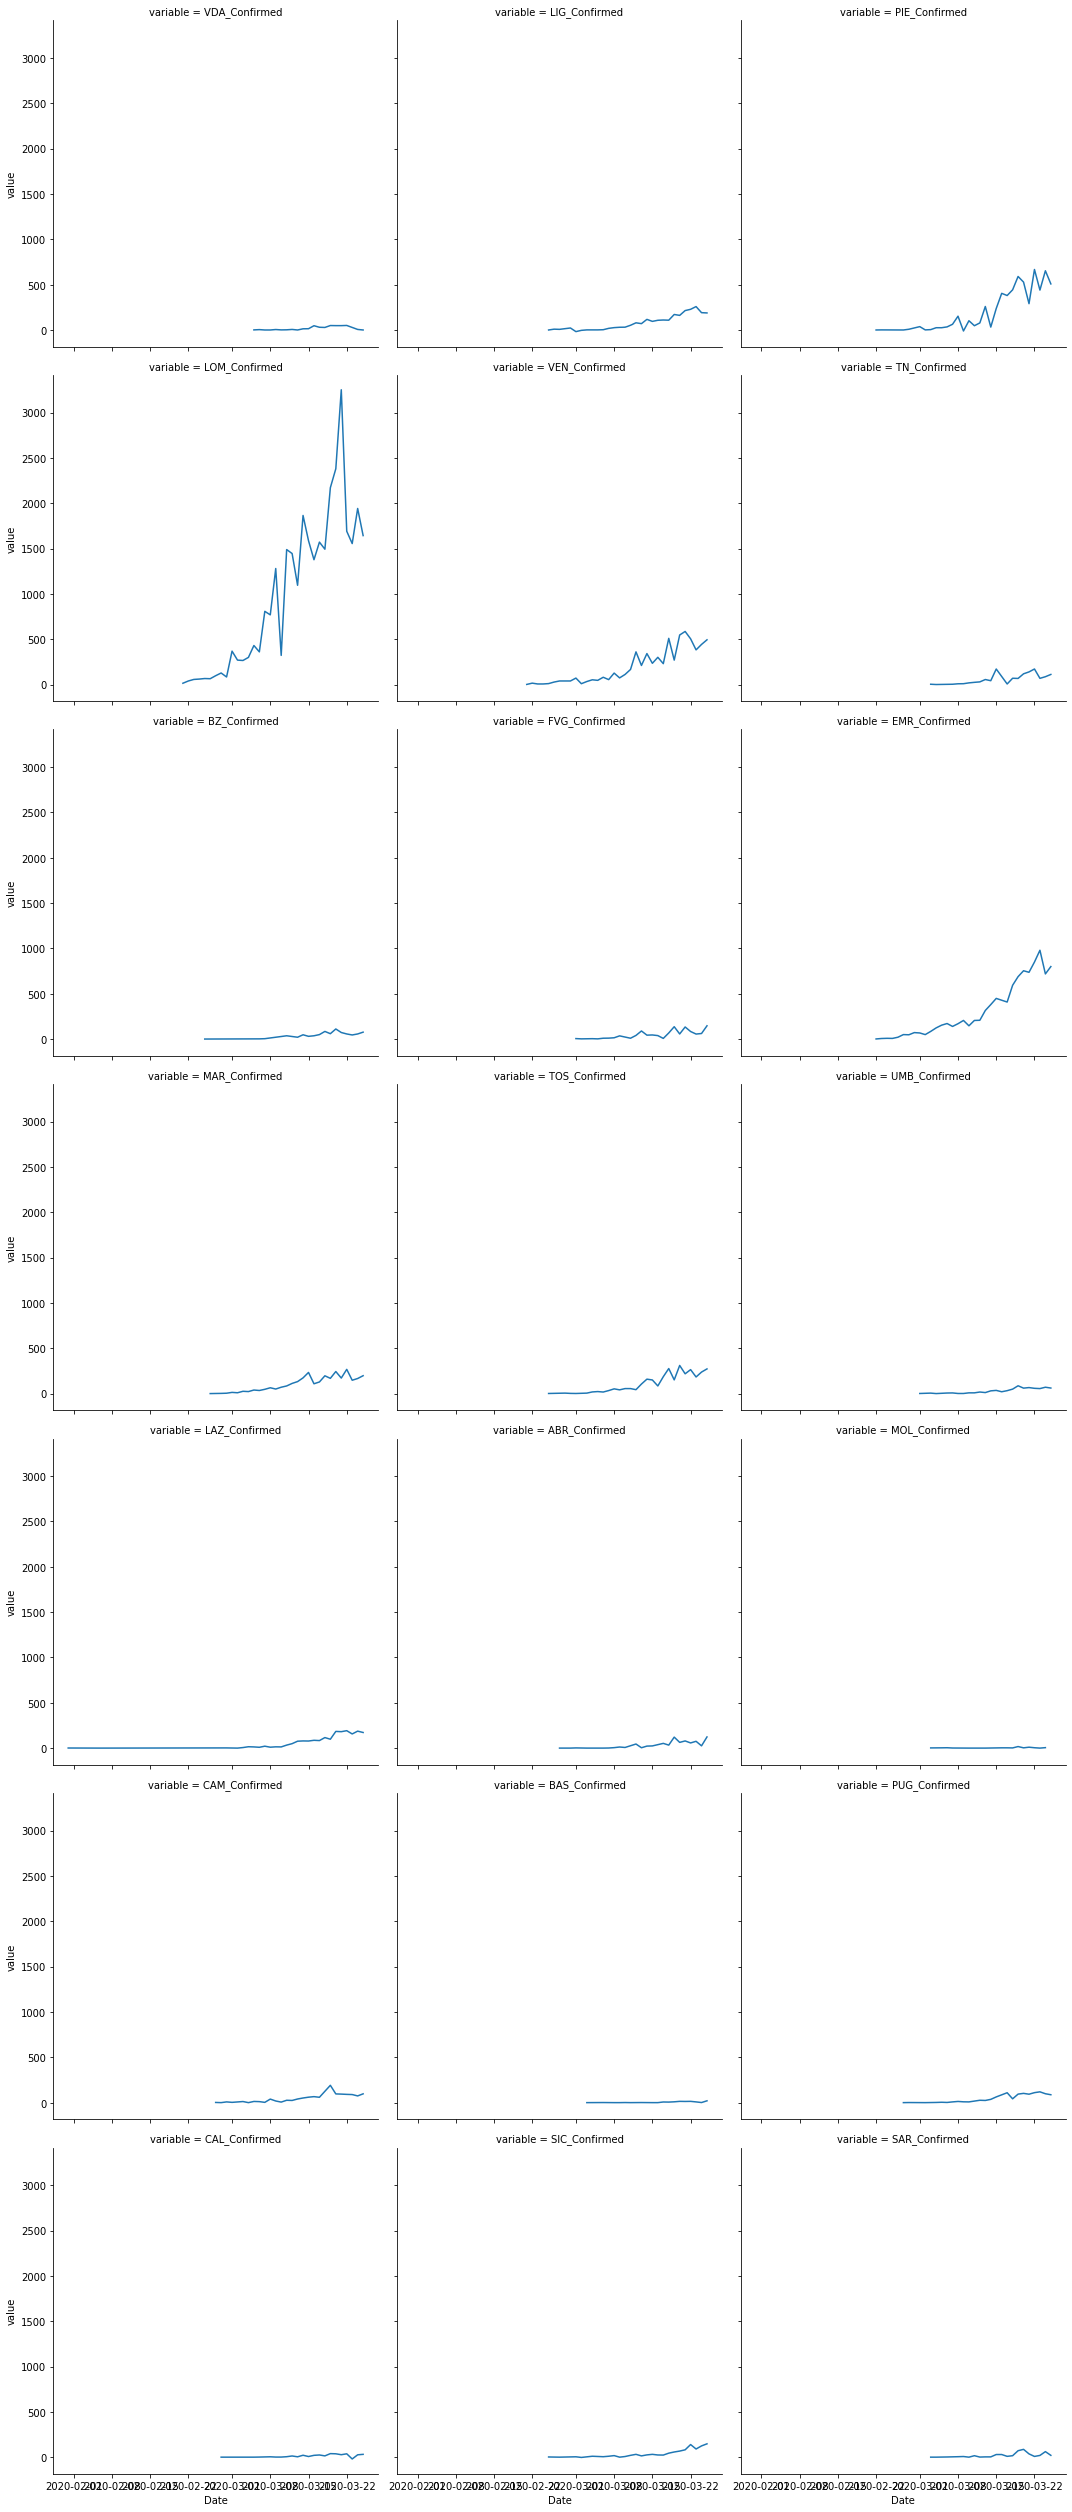

In [68]:
sns.relplot('Date', 'value', data=df_confirmed.reset_index(), col='variable', col_wrap=3, kind="line")
plt.show()

In [73]:
df_long = pd.read_excel("data/italy_20200325.xlsx", sheet_name='Long', parse_dates=['Date'], dayfirst=True)
df_long

,Direction,Region,Date,Confirmed,Deaths
0,North-West,VDA,2020-01-31,NaN,NaN
1,North-West,VDA,2020-02-06,NaN,NaN
2,North-West,VDA,2020-02-21,NaN,NaN
3,North-West,VDA,2020-02-22,NaN,NaN
4,North-West,VDA,2020-02-23,NaN,NaN
...,...,...,...,...,...
751,Islands,SAR,2020-03-21,37.0,2.0
752,Islands,SAR,2020-03-22,9.0,3.0
753,Islands,SAR,2020-03-23,20.0,4.0
754,Islands,SAR,2020-03-24,62.0,4.0


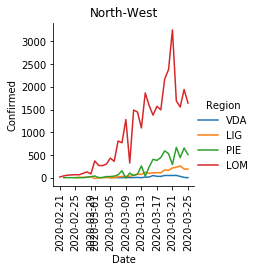

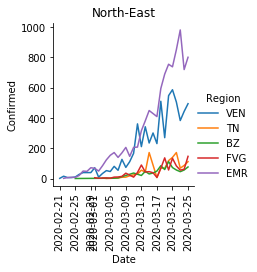

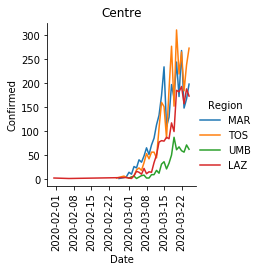

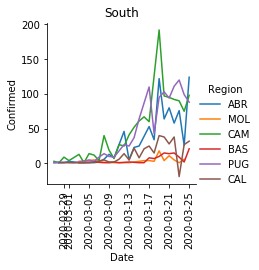

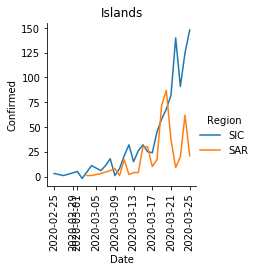

In [83]:
for direction in df_long['Direction'].unique():
    g = sns.FacetGrid(df_long[df_long['Direction'] == direction], hue="Region")
    g.map(sns.lineplot, "Date", "Confirmed")
    g.add_legend()
    plt.title(direction)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
df_long['Direction']